# Feed forward Neural Network using Gradient Descent

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split


#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

#Tanh and its derivative
def tanh(x):
    return (2/(1+np.exp(-2*x)))-1

def tanh_deriv(x):
    return (1 - (sigmoid(x)*sigmoid(x)))

#Normalize array
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)



# Working on 0.3 million stratified Dataset

In [40]:
import pandas as pd
import numpy as np
import category_encoders as ce
df = pd.read_csv('preprocessed_dataset.csv')

In [41]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["FIRE_SIZE_CLASS"] = lb_make.fit_transform(df["FIRE_SIZE_CLASS"]) # because it is ordinal
df["STATE"] = lb_make.fit_transform(df["STATE"])
df["STAT_CAUSE_DESCR"] = lb_make.fit_transform(df["STAT_CAUSE_DESCR"])
#df["STAT_CAUSE_DESCR"] = lb_make.fit_transform(df["STAT_CAUSE_DESCR"])
df['FIRE_MONTH'] = pd.to_datetime(df['DISCOVERY_DATE']).dt.month
df.head(2)

,FOD_ID,NWCG_REPORTING_AGENCY,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,COUNTY,FIRE_MONTH
0,46487,FS,Salmon-Challis National Forest,1992,1992-06-20,1.0,6,0.1,0,45.308333,-114.475,USFS,13,1035,1992-06-20,1336.0,Lemhi County,6
1,242377,BLM,Rock Springs Field Office,1992,1992-08-21,1.0,6,0.1,0,41.416600,-109.234,BLM,51,1428,1992-08-22,1800.0,Sweetwater County,8


In [42]:
X = df[['FIRE_YEAR','FIRE_MONTH','STATE','FIRE_SIZE']]
y = df['STAT_CAUSE_DESCR']

In [43]:
X = normalize(X)

In [44]:
X

,FIRE_YEAR,FIRE_MONTH,STATE,FIRE_SIZE
0,0.999974,0.003012,0.006526,0.000050
1,0.999664,0.004015,0.025594,0.000050
2,0.999993,0.003012,0.002008,0.000050
3,0.999819,0.004015,0.018571,0.000050
4,0.999993,0.003012,0.002008,0.000050
...,...,...,...,...
376096,0.999998,0.001489,0.001489,0.000050
376097,0.999996,0.001985,0.001985,0.000496
376098,0.999990,0.003970,0.001985,0.000050
376099,0.999993,0.003474,0.001489,0.000050


In [45]:
x = X.values

In [46]:
y = to_one_hot(y)

In [47]:
y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

# Predicting fire cause given fire size, location and time of fire

no of epochs =  10


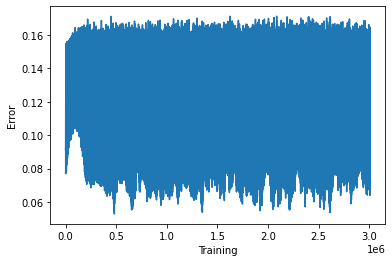

Training Accuracy 86.86%
Test Accuracy 86.9%


In [38]:
#Split data to training and validation data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)
hidden_units = 5
output_dim = 13
input_dim = 4
b1 = 1
#Weights
w1 = random.uniform(-.05,.05)*np.random.random((input_dim, hidden_units))  #for input   - 4 inputs, 3 outputs
w2 = random.uniform(-.05,.05)*np.random.random((hidden_units, output_dim))  #, 3 outputs

#training rate
e = 0.01
epochs = 10
m = len(yTrain)
#Errors - for graph later
errors = []
accuracy = []
val_accuracy = []
cost_history = []
cost_val_history = []
#Train
for i in range(epochs):
    for j in range(m):
        rand_ind = np.random.randint(0,m)
        inputs = xTrain[rand_ind,:]
        outputs = yTrain[rand_ind]
        #Feed forward
        layer0 = inputs
        z_layer1= layer0.dot(w1)
        layer1 = tanh(z_layer1)       # activation of layer1
        z_layer2 = z_layer1.dot(w2)
        layer2 = tanh(z_layer2)  # activation of layer2
        
        #Back propagation using gradient descent
        layer2_error = outputs - layer2
        layer2_delta = layer2_error * tanh_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w2.T)
        layer1_delta = layer1_error * tanh_deriv(layer1)

        w2 += np.asmatrix(layer1).T.dot(np.asmatrix(layer2_delta)) * e
        w1 += np.asmatrix(layer0).T.dot(np.matrix(layer1_delta)) * e

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy.append((1 - error) * 100)
         #Validate
        rand_ind = np.random.randint(0,len(yTest))
        layer0 = xTest[rand_ind,:]
        layer1 = sigmoid(np.dot(layer0, w1))
        layer2 = sigmoid(np.dot(layer1, w2))

        layer2_error = yTest[rand_ind] - layer2

        error = np.mean(np.abs(layer2_error))
        val_accuracy.append((1 - error) * 100)
        
    cost_history.append(np.mean(np.abs(accuracy)))
    cost_val_history.append(np.mean(np.abs(val_accuracy)))
    

#Plot the accuracy chart
print("no of epochs = ", str(epochs))
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(np.mean(np.abs(cost_history)),2)) + "%")
print("Test Accuracy " + str(round(np.mean(np.abs(cost_val_history)),2)) + "%")